In [1]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
database = connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [5]:
cur = database.cursor()

In [6]:
query = 'SELECT * FROM car_loan_dti;'

cur.execute(query)

393

In [7]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_42932\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [7]:
df.head()

loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0     1256    Male   46  40-50 years        Married                 3   
1     1697    Male   24  20-30 years         Single                 4   
2     1073    Male   51  50-60 years        Married                 1   
3      954  Female   24  20-30 years         Single                 2   
4      302  Female   39  30-40 years        Married                 4   

  educational_level employment_type geographical_location type_of_residence  \
0            Master      Unemployed                 Urban            Rented   
1          Bachelor        Salaried                 Urban            Rented   
2       High School   Self-employed                 Urban            Rented   
3             Ph.D.   Self-employed                 Urban             Owned   
4          Bachelor        Salaried                 Urban      With Parents   

   ...  loan_amount Loan_bins  loan_term_yrs  loan_purpose  approval_status  \
0  ...       212591     0-1Cr             10      Car Loan         Approved   
1  ...      1067743     0-1Cr              5      Car Loan         Rejected   
2  ...      3413221     0-1Cr              5      Car Loan         Approved   
3  ...       494854     0-1Cr              5      Car Loan         Approved   
4  ...      2190468     0-1Cr             30      Car Loan         Approved   

   previous_loan_experience credit_history  cibil_score  \
0                  Positive           Fair          604   
1                  Negative      Very Good          774   
2                      None           Good          691   
3                  Positive           Good          688   
4                  Negative           Good          735   

               cibil_scorebins  property_ownership  
0     600-649: Doubtfull Score               Owned  
1     750-900: Excellent Score               Owned  
2  650-699: Satisfactory Score              Rented  
3  650-699: Satisfactory Score               Owned  
4         700- 749: Good Score               Owned  

[5 rows x 31 columns]

In [8]:
df.tail()

loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
388     1768    Male   54  50-60 years        Married                 1   
389      519  Female   44  40-50 years       Divorced                 1   
390      534  Female   62  >= 60 years         Single                 4   
391      239  Female   28  20-30 years        Married                 0   
392     1696    Male   39  30-40 years        Married                 4   

    educational_level employment_type geographical_location type_of_residence  \
388          Bachelor      Government                 Urban             Owned   
389             Ph.D.   Self-employed                 Urban      With Parents   
390       High School        Salaried                 Rural             Owned   
391            Master      Government                 Urban            Rented   
392            Master        Salaried                 Urban      With Parents   

     ...  loan_amount Loan_bins  loan_term_yrs  loan_purpose  approval_status  \
388  ...      3731460     0-1Cr             20      Car Loan         Rejected   
389  ...      4164316     0-1Cr              5      Car Loan         Approved   
390  ...       126407     0-1Cr              5      Car Loan         Approved   
391  ...      4712858     0-1Cr             25      Car Loan         Approved   
392  ...      1387719     0-1Cr             20      Car Loan         Rejected   

     previous_loan_experience credit_history  cibil_score  \
388                      None           Good          678   
389                      None           Good          696   
390                  Positive           Good          744   
391                      None           Good          698   
392                  Positive      Very Good          766   

                 cibil_scorebins  property_ownership  
388  650-699: Satisfactory Score               Owned  
389  650-699: Satisfactory Score              Rented  
390         700- 749: Good Score              Rented  
391  650-699: Satisfactory Score               Owned  
392     750-900: Excellent Score               Owned  

[5 rows x 31 columns]

In [8]:
#Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
1     1697    Male   24  20-30 years         Single                 4   
2     1073    Male   51  50-60 years        Married                 1   
3      954  Female   24  20-30 years         Single                 2   
4      302  Female   39  30-40 years        Married                 4   
6     1478  Female   29  20-30 years         Single                 2   

  educational_level employment_type geographical_location type_of_residence  \
1          Bachelor        Salaried                 Urban            Rented   
2       High School   Self-employed                 Urban            Rented   
3             Ph.D.   Self-employed                 Urban             Owned   
4          Bachelor        Salaried                 Urban      With Parents   
6          Bachelor      Unemployed                 Rural             Owned   

   ...  loan_amount Loan_bins  loan_term_yrs  loan_

In [10]:
df.describe()

loan_id         age  no_of_dependents  income_annum  MonthlySalary  \
count   381.000000  381.000000        381.000000  3.810000e+02     381.000000   
mean    982.070866   41.916010          1.868766  1.145917e+06   95493.157480   
std     588.924611   13.320869          1.417409  4.948430e+05   41236.904631   
min       4.000000   18.000000          0.000000  3.002900e+05   25024.000000   
25%     470.000000   31.000000          1.000000  7.249630e+05   60414.000000   
50%     959.000000   43.000000          2.000000  1.131694e+06   94308.000000   
75%    1515.000000   53.000000          3.000000  1.596239e+06  133020.000000   
max    2000.000000   64.000000          4.000000  1.999271e+06  166606.000000   

       monthly_obligations         DTI  savings_account_balance  \
count           381.000000  381.000000               381.000000   
mean          25024.322835   33.779891            250378.724409   
std           14474.118782   29.717328            136104.711422   
min              28.000000    0.024400             13088.000000   
25%           12148.000000   13.605200            130527.000000   
50%           24286.000000   26.224500            259488.000000   
75%           37705.000000   45.850500            349748.000000   
max           49789.000000  187.752500            497642.000000   

       investment_portfolio_value  insurance_policies   loan_amount  \
count                  381.000000        3.810000e+02  3.810000e+02   
mean                501568.923885        2.559906e+06  2.587173e+06   
std                 285087.549024        1.468746e+06  1.440617e+06   
min                   2607.000000        7.006300e+04  5.044300e+04   
25%                 248038.000000        1.234865e+06  1.379780e+06   
50%                 511023.000000        2.500989e+06  2.602842e+06   
75%                 728690.000000        3.860373e+06  3.928344e+06   
max                 997414.000000        4.970693e+06  4.970549e+06   

       loan_term_yrs  cibil_score  
count     381.000000   381.000000  
mean       17.257218   657.569554  
std         8.375841   165.044487  
min         5.000000     0.000000  
25%        10.000000   643.000000  
50%        20.000000   699.000000  
75%        25.000000   765.000000  
max        30.000000   900.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 1 to 392
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_id                     381 non-null    int64  
 1   gender                      381 non-null    object 
 2   age                         381 non-null    int64  
 3   AgeGroup                    381 non-null    object 
 4   marital_status              381 non-null    object 
 5   no_of_dependents            381 non-null    int64  
 6   educational_level           381 non-null    object 
 7   employment_type             381 non-null    object 
 8   geographical_location       381 non-null    object 
 9   type_of_residence           381 non-null    object 
 10  income_annum                381 non-null    int64  
 11  income_buckets              381 non-null    object 
 12  MonthlySalary               381 non-null    float64
 13  monthly_obligations         381 non-null

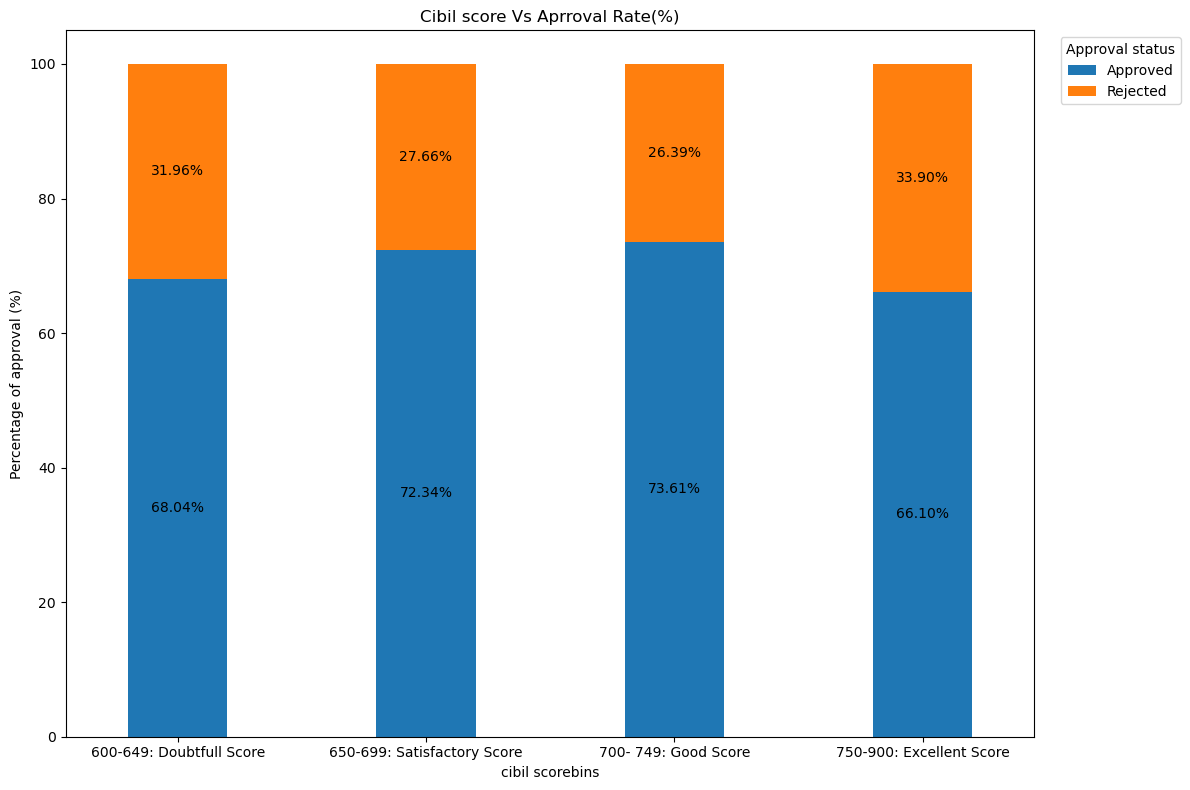

In [13]:
# Approval Rate Vs CIBIL Score bins
approval_rates = df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()
normalized_data=approval_rates.div(approval_rates.sum(axis=1),axis=0)*100
ax=normalized_data.plot(kind='bar',stacked=True,figsize=(12,8),width=0.4)


# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')
plt.xlabel('cibil scorebins')
plt.ylabel('Percentage of approval (%)')
plt.title('Cibil score Vs Aprroval Rate(%)')
plt.xticks(rotation=360)
        
# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

Approval Status vs Income Buckets:
  income_buckets approval_status  counts
0      0-5 Lakhs        Approved      48
1      0-5 Lakhs        Rejected      34
2    10-15 Lakhs        Approved     153
3    10-15 Lakhs        Rejected      69
4    15-20 Lakhs        Approved     166
5    15-20 Lakhs        Rejected      78
6     5-10 Lakhs        Approved     139
7     5-10 Lakhs        Rejected      65


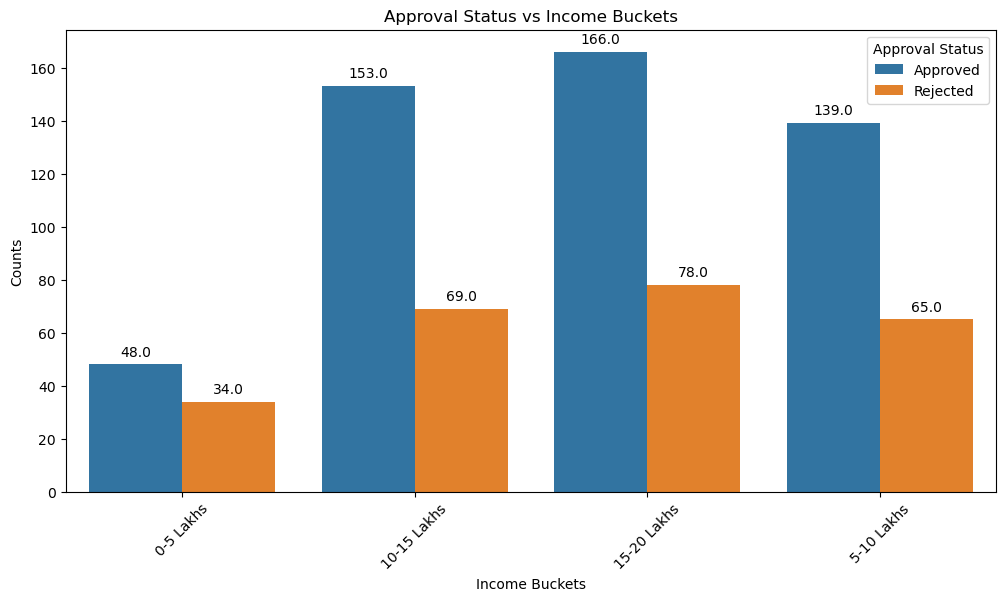

In [14]:
# Overall Calculations
# Group by income buckets and approval status to count the occurrences
approval_vs_income = df.groupby(['income_buckets', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Income Buckets:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='income_buckets', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Income Buckets')
plt.xlabel('Income Buckets')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs Savings_bins:
  Savings_bins approval_status  counts
0         0-1L        Approved      53
1         0-1L        Rejected      19
2        1L-2L        Approved      42
3        1L-2L        Rejected      26
4        2L-3L        Approved      63
5        2L-3L        Rejected      22
6        3L-4L        Approved      69
7        3L-4L        Rejected      27
8        4L-5L        Approved      38
9        4L-5L        Rejected      22


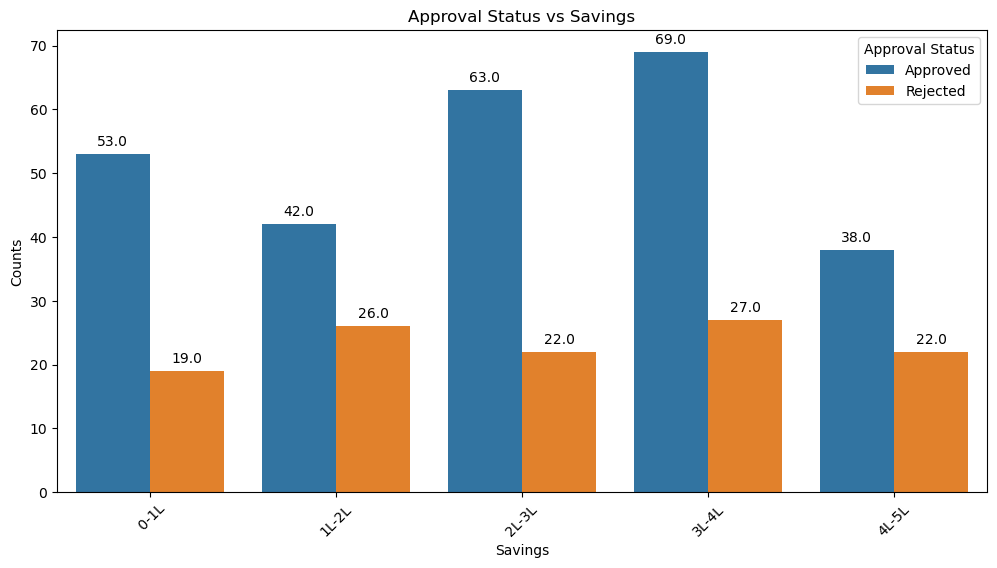

In [14]:
# Overall Calculations
# Group by Savings bins and approval status to count the occurrences
approval_vs_income = df.groupby(['Savings_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Savings_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Savings_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Savings')
plt.xlabel('Savings')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs investment_bins:
  investment_bins approval_status  counts
0            0-2L        Approved      47
1            0-2L        Rejected      22
2           2L-4L        Approved      60
3           2L-4L        Rejected      25
4           4L-6L        Approved      52
5           4L-6L        Rejected      19
6           6L-8L        Approved      56
7           6L-8L        Rejected      23
8          8L-10L        Approved      50
9          8L-10L        Rejected      27


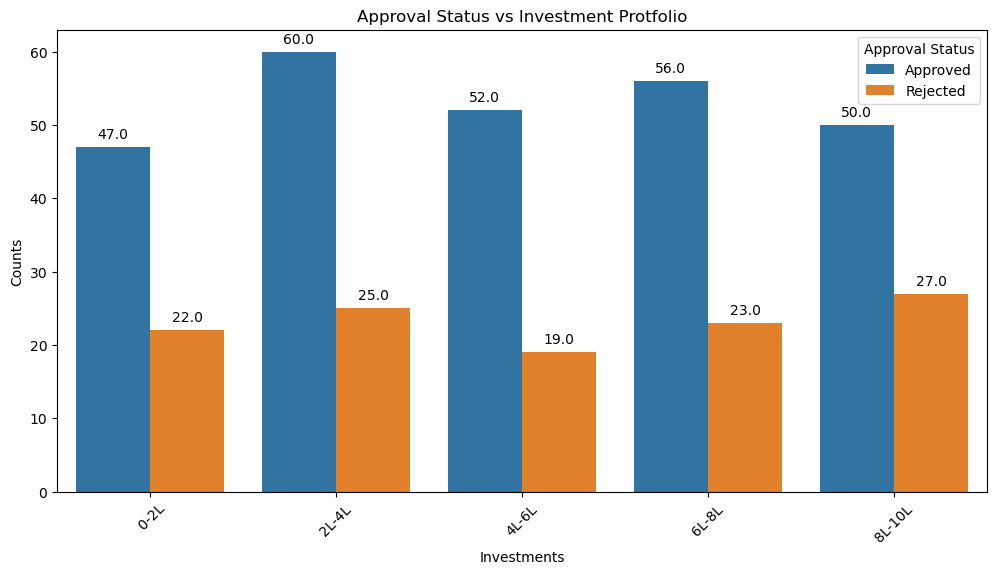

In [15]:
# Overall Calculations
# Group by investments and approval status to count the occurrences
approval_vs_income = df.groupby(['investment_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs investment_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='investment_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Investment Protfolio')
plt.xlabel('Investments')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs insurance_bins:
  insurance_bins approval_status  counts
0          0-10L        Approved      53
1          0-10L        Rejected      21
2        10L-20L        Approved      52
3        10L-20L        Rejected      27
4        20L-30L        Approved      42
5        20L-30L        Rejected      19
6        30L-40L        Approved      58
7        30L-40L        Rejected      22
8        40L-50L        Approved      60
9        40L-50L        Rejected      27


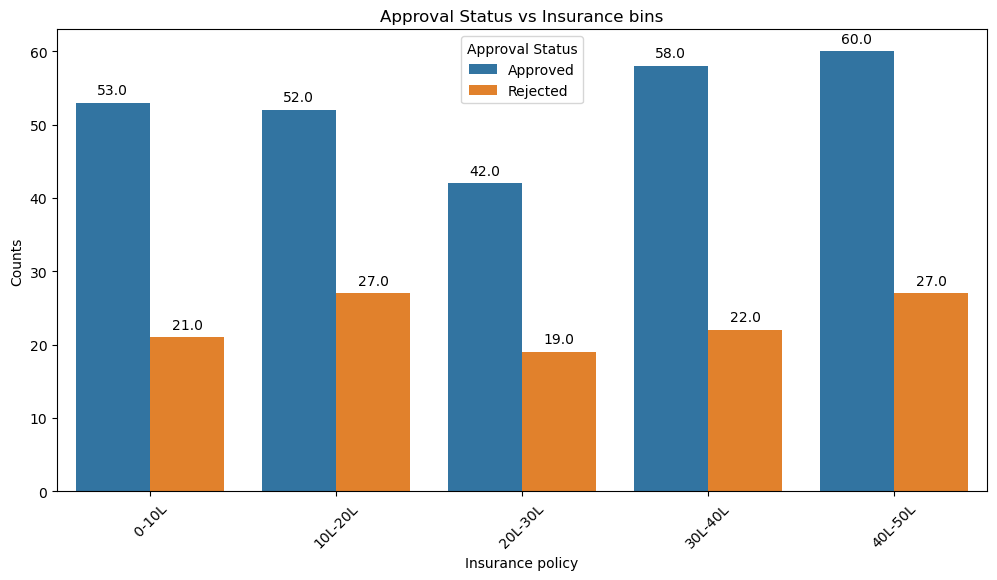

In [9]:
# Overall Calculations
# Group by investments and approval status to count the occurrences
approval_vs_income = df.groupby(['insurance_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs insurance_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='insurance_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Insurance bins')
plt.xlabel('Insurance policy')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs Loan_bins:
  Loan_bins approval_status  counts
0     0-1Cr        Approved     265
1     0-1Cr        Rejected     116


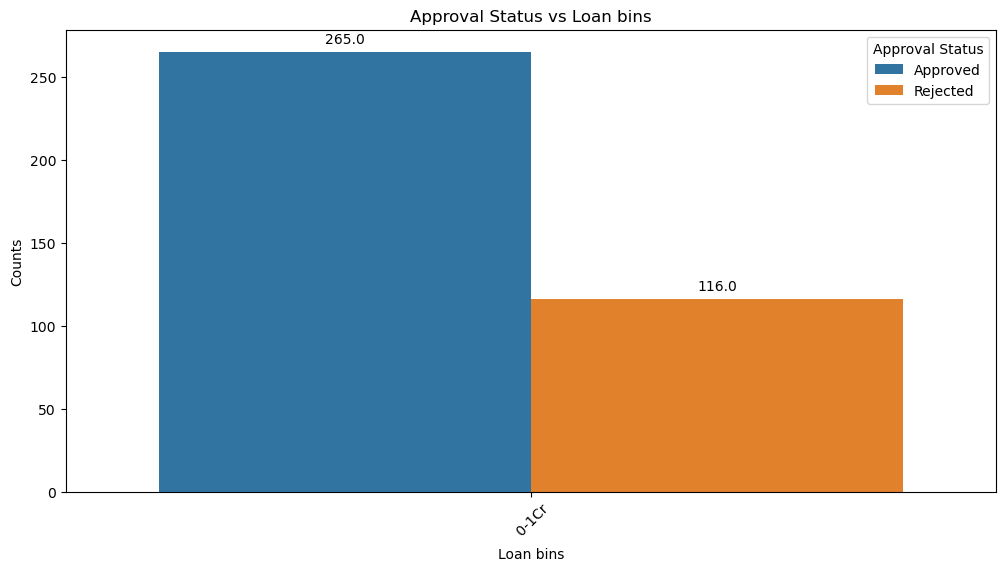

In [17]:
# Overall Calculations
# Group by Loan bins and approval status to count the occurrences
approval_vs_income = df.groupby(['Loan_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Loan_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Loan_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Loan bins')
plt.xlabel('Loan bins')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

In [18]:
# Overall Calculations
# Group by Term and approval status to count the occurrences
approval_vs_income = df.groupby(['loan_term_yrs', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs loan_term_yrs:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='loan_term_yrs', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs loan_term_yrs')
plt.xlabel('loan_term_yrs')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs loan_term_yrs:
    loan_term_yrs approval_status  counts
0               5        Approved      43
1               5        Rejected      20
2              10        Approved      47
3              10        Rejected      19
4              15        Approved      43
5              15        Rejected      17
6              20        Approved      49
7              20        Rejected      30
8              25        Approved      44
9              25        Rejected      10
10             30        Approved      39
11             30        Rejected      20


Approval Status vs Previous loan exp:
  previous_loan_experience approval_status  counts
0                 Negative        Approved      31
1                 Negative        Rejected      12
2                     None        Approved     123
3                     None        Rejected      52
4                 Positive        Approved     111
5                 Positive        Rejected      52


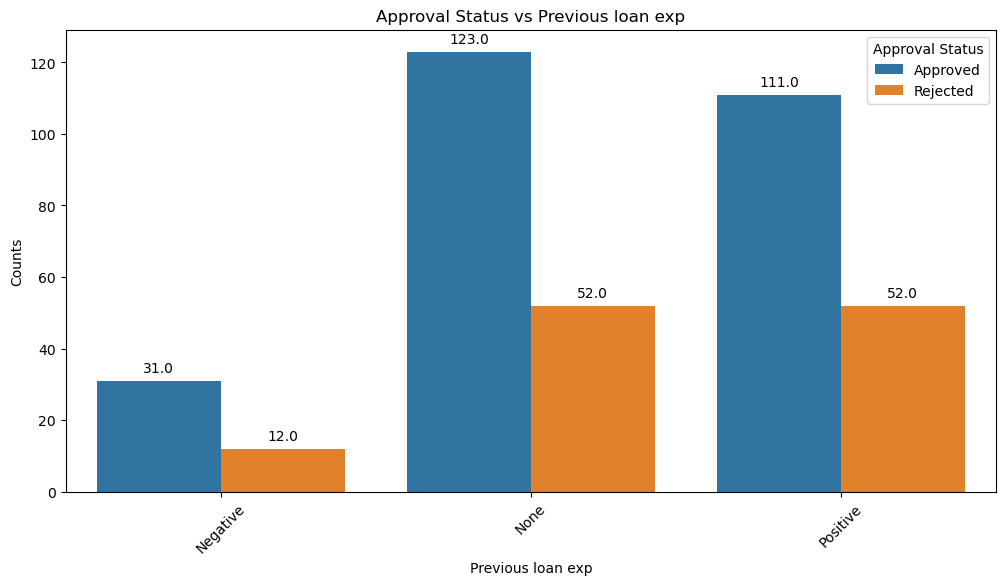

In [19]:
# Group by previous_loan_experience and approval status to count the occurrences
approval_vs_income = df.groupby(['previous_loan_experience', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Previous loan exp:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='previous_loan_experience', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Previous loan exp')
plt.xlabel('Previous loan exp')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

In [20]:
# Group by credit_history and approval status to count the occurrences
approval_vs_income = df.groupby(['credit_history', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs credit history:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='credit_history', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs credit_history')
plt.xlabel('credit_history')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs credit history:
   credit_history approval_status  counts
0       Excellent        Approved      21
1       Excellent        Rejected       8
2            Fair        Approved       9
3            Fair        Rejected       7
4            Good        Approved     121
5            Good        Rejected      45
6           NA/NH        Approved       4
7           NA/NH        Rejected       4
8            Poor        Approved      53
9            Poor        Rejected      20
10      Very Good        Approved      57
11      Very Good        Rejected      32


Demographics

In [22]:
# Group by gender and count the occurrences
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'counts']

# Display the result
print("Total number of applicants gender-wise:")
print(gender_counts)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts['counts'], labels=gender_counts['gender'], autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Applicants Gender-wise')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Total number of applicants gender-wise:
   gender  counts
0  Female     194
1    Male     186
2   Other       1


Approval Status vs AgeGroup:
       AgeGroup approval_status  counts
0   20-30 years        Approved      57
1   20-30 years        Rejected      21
2   30-40 years        Approved      54
3   30-40 years        Rejected      29
4   40-50 years        Approved      58
5   40-50 years        Rejected      27
6   50-60 years        Approved      58
7   50-60 years        Rejected      21
8    < 20 years        Approved       4
9    < 20 years        Rejected       3
10  >= 60 years        Approved      34
11  >= 60 years        Rejected      15


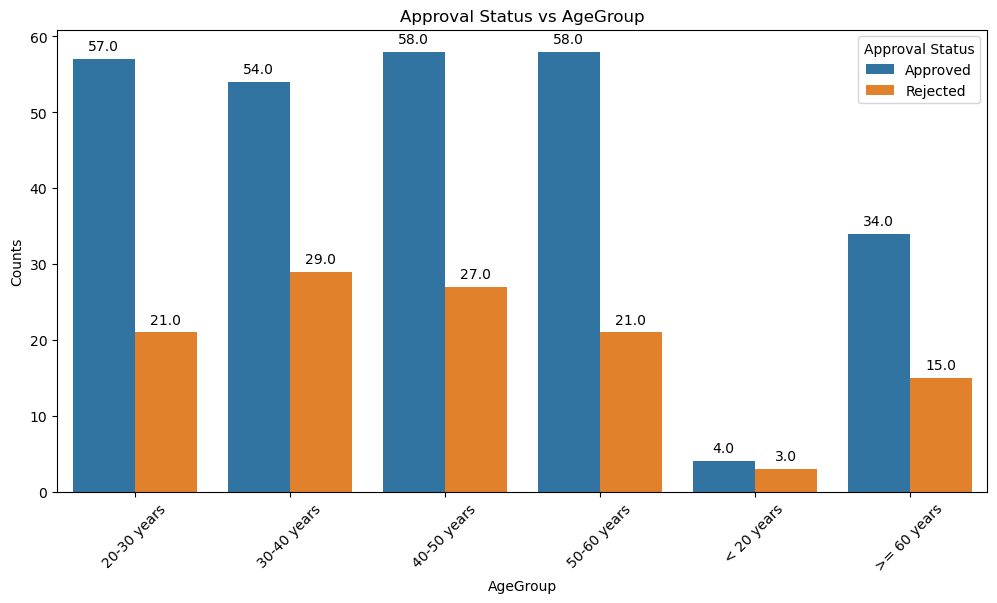

In [11]:
# Group by AgeGroup and approval status to count the occurrences
approval_vs_Age = df.groupby(['AgeGroup', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs AgeGroup:")
print(approval_vs_Age)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='AgeGroup', y='counts', hue='approval_status', data=approval_vs_Age)
plt.title('Approval Status vs AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

In [12]:
# Group by marital_status and approval status to count the occurrences
approval_vs_maritial = df.groupby(['marital_status', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs marital_status:")
print(approval_vs_maritial)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='marital_status', y='counts', hue='approval_status', data=approval_vs_maritial)
plt.title('Approval Status vs AgeGroup')
plt.xlabel('marital_status')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs marital_status:
  marital_status approval_status  counts
0       Divorced        Approved      50
1       Divorced        Rejected      12
2        Married        Approved     123
3        Married        Rejected      62
4         Single        Approved      86
5         Single        Rejected      38
6        Widowed        Approved       6
7        Widowed        Rejected       4


Approval Status vs no_of_dependents:
   no_of_dependents approval_status  counts
0                 0        Approved      54
1                 0        Rejected      30
2                 1        Approved      64
3                 1        Rejected      21
4                 2        Approved      56
5                 2        Rejected      26
6                 3        Approved      39
7                 3        Rejected      18
8                 4        Approved      52
9                 4        Rejected      21


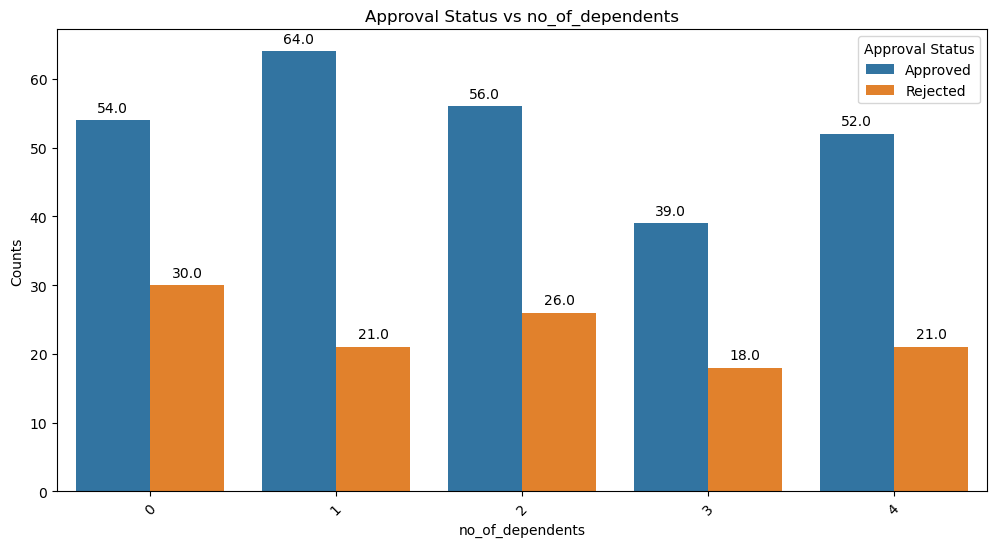

In [13]:
# Group by no_of_dependents and approval status to count the occurrences
approval_vs_dependents = df.groupby(['no_of_dependents', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs no_of_dependents:")
print(approval_vs_dependents)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='no_of_dependents', y='counts', hue='approval_status', data=approval_vs_dependents)
plt.title('Approval Status vs no_of_dependents')
plt.xlabel('no_of_dependents')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

In [14]:

# Group by educational_level and approval status to count the occurrences
approval_vs_edu = df.groupby(['educational_level', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs educational_level:")
print(approval_vs_edu)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='educational_level', y='counts', hue='approval_status', data=approval_vs_edu)
plt.title('Approval Status vs educational_level')
plt.xlabel('educational_level')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs educational_level:
  educational_level approval_status  counts
0          Bachelor        Approved      98
1          Bachelor        Rejected      45
2       High School        Approved      23
3       High School        Rejected      13
4            Master        Approved     117
5            Master        Rejected      50
6             Ph.D.        Approved      27
7             Ph.D.        Rejected       8


In [15]:
# Group by employment_type and approval status to count the occurrences
approval_vs_emp = df.groupby(['employment_type', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs educational_level:")
print(approval_vs_emp)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='employment_type', y='counts', hue='approval_status', data=approval_vs_emp)
plt.title('Approval Status vs employment_type')
plt.xlabel('employment_type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs educational_level:
  employment_type approval_status  counts
0      Government        Approved      49
1      Government        Rejected      15
2        Salaried        Approved     147
3        Salaried        Rejected      62
4   Self-employed        Approved      69
5   Self-employed        Rejected      37
6      Unemployed        Rejected       2


Approval Status vs geographical_location:
  geographical_location approval_status  counts
0                 Rural        Approved      95
1                 Rural        Rejected      38
2                 Urban        Approved     170
3                 Urban        Rejected      78


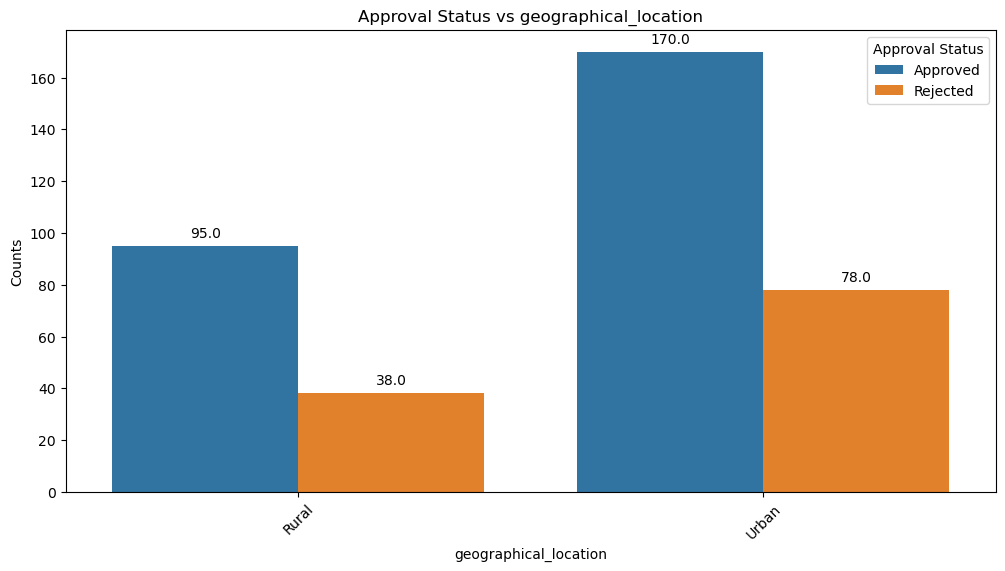

In [16]:

# Group by geographical_location and approval status to count the occurrences
approval_vs_loc = df.groupby(['geographical_location', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs geographical_location:")
print(approval_vs_loc)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='geographical_location', y='counts', hue='approval_status', data=approval_vs_loc)
plt.title('Approval Status vs geographical_location')
plt.xlabel('geographical_location')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs type_of_residence:
  type_of_residence approval_status  counts
0             Owned        Approved     163
1             Owned        Rejected      72
2            Rented        Approved      73
3            Rented        Rejected      37
4      With Parents        Approved      29
5      With Parents        Rejected       7


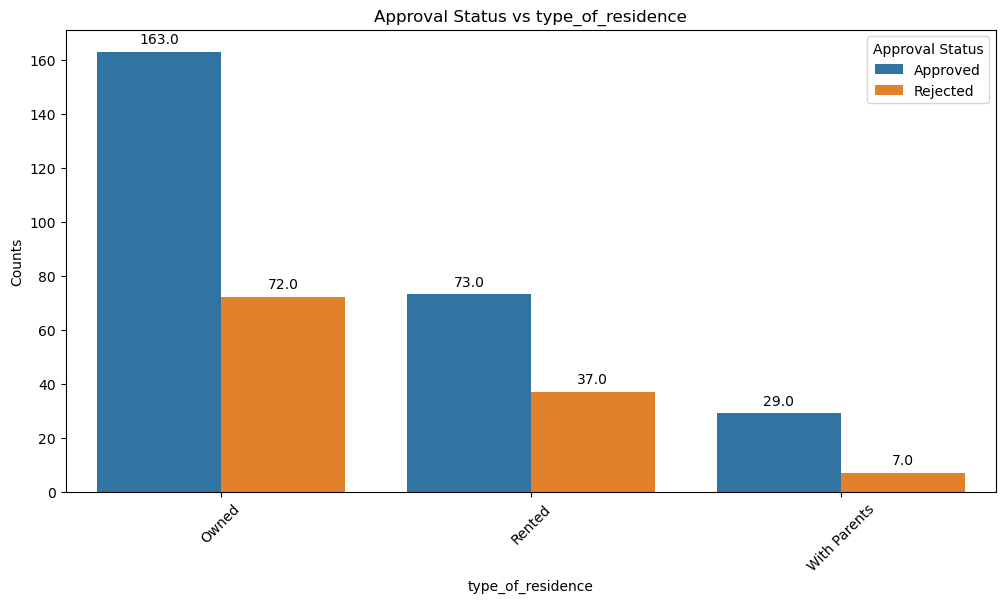

In [17]:
# Group by type_of_residence and approval status to count the occurrences
approval_vs_res = df.groupby(['type_of_residence', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs type_of_residence:")
print(approval_vs_res)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='type_of_residence', y='counts', hue='approval_status', data=approval_vs_res)
plt.title('Approval Status vs type_of_residence')
plt.xlabel('type_of_residence')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


In [18]:

# Group by property_ownership and approval status to count the occurrences
approval_vs_own = df.groupby(['property_ownership', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs property_ownership:")
print(approval_vs_own)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='property_ownership', y='counts', hue='approval_status', data=approval_vs_own)
plt.title('Approval Status vs property_ownership')
plt.xlabel('property_ownership')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs property_ownership:
  property_ownership approval_status  counts
0              Owned        Approved     174
1              Owned        Rejected      81
2             Rented        Approved      91
3             Rented        Rejected      35


In [36]:
# Filter the DataFrame based on specified CIBIL score bins and DTI ratio
filtered_df = df[(df['DTI'] <= 40) & 
                 ((df['cibil_scorebins'] == '600-649: Doubtfull Score') | 
                  (df['cibil_scorebins'] == '650-699: Satisfactory Score') | 
                  (df['cibil_scorebins'] == '700- 749: Good Score') | 
                  (df['cibil_scorebins'] == '750-900: Excellent Score'))]

# Group by CIBIL score bins and approval status
approval_by_score_bins = filtered_df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_score_bins.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('CIBIL Score Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval/Rejection Based on CIBIL Score Bins (DTI < 40%)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

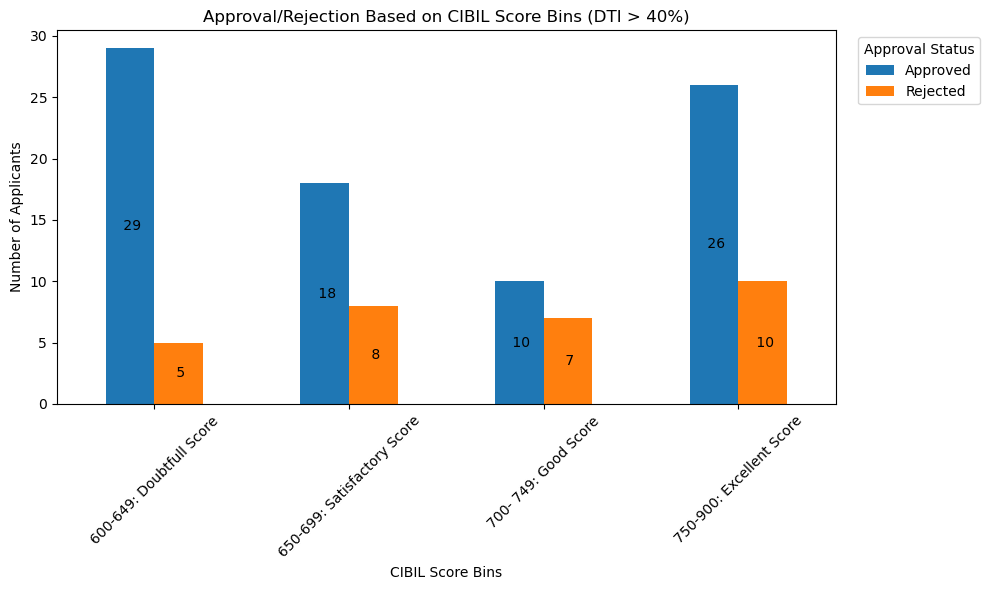

In [37]:
# Filter the DataFrame based on specified CIBIL score bins and DTI ratio
filtered_df = df[(df['DTI'] > 40) & 
                 ((df['cibil_scorebins'] == '600-649: Doubtfull Score') | 
                  (df['cibil_scorebins'] == '650-699: Satisfactory Score') | 
                  (df['cibil_scorebins'] == '700- 749: Good Score') | 
                  (df['cibil_scorebins'] == '750-900: Excellent Score'))]

# Group by CIBIL score bins and approval status
approval_by_score_bins = filtered_df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_score_bins.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('CIBIL Score Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval/Rejection Based on CIBIL Score Bins (DTI > 40%)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

In [38]:
# Filter the DataFrame for DTI > 40
filtered_df = df[df['DTI'] > 40]

# Group by credit history and approval status to get the counts
credit_history_vs_approval = filtered_df.groupby(['credit_history', 'approval_status']).size().reset_index(name='counts')

# Plotting the bar chart for credit history with approval status for applicants with DTI > 42%
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=credit_history_vs_approval, x='credit_history', y='counts', hue='approval_status', palette='viridis')

# Set plot title and labels
plt.title('Credit History vs Approval Status for Applicants with DTI > 42%')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

In [39]:
# Filter the DataFrame for DTI > 40 and approval status 'Rejected'
filtered_df = df[(df['DTI'] > 40) & (df['approval_status'] == 'Rejected')]

# Group by income buckets to get the counts
income_vs_counts = filtered_df['income_buckets'].value_counts().reset_index()
income_vs_counts.columns = ['income_buckets', 'counts']

# Plotting the bar chart for income buckets
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=income_vs_counts, x='income_buckets', y='counts', palette='viridis')

# Set plot title and labels
plt.title('Income Buckets for Applicants with DTI > 42% and Loan Rejected')
plt.xlabel('Income Buckets')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

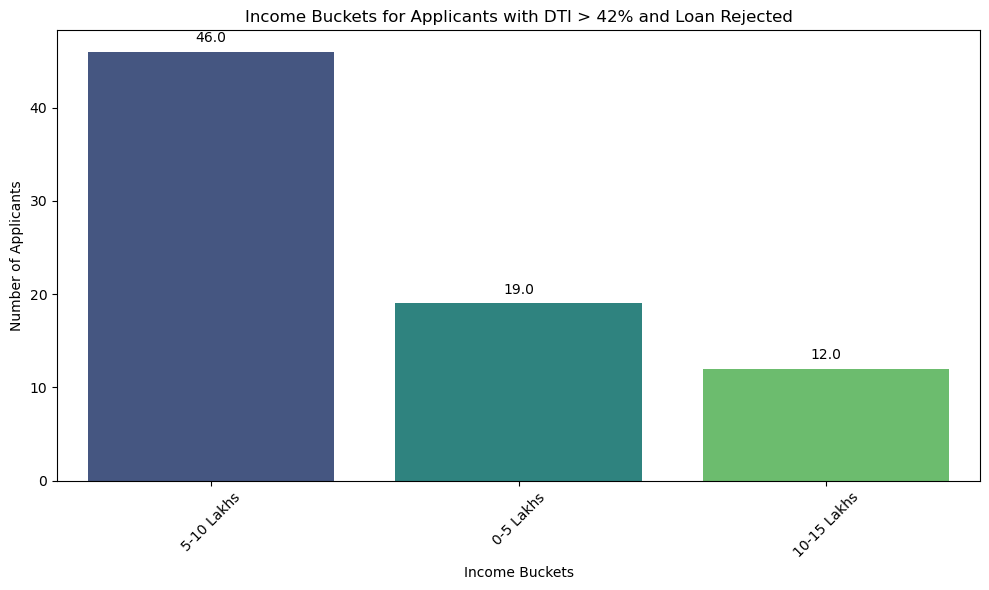

In [40]:
# Filter the DataFrame for DTI > 42 and approval status 'Rejected'
filtered_df = df[(df['DTI'] > 42) & (df['approval_status'] == 'Approved')]

# Group by income buckets to get the counts
income_vs_counts = filtered_df['income_buckets'].value_counts().reset_index()
income_vs_counts.columns = ['income_buckets', 'counts']

# Plotting the bar chart for income buckets
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=income_vs_counts, x='income_buckets', y='counts', palette='viridis')

# Set plot title and labels
plt.title('Income Buckets for Applicants with DTI > 42% and Loan Rejected')
plt.xlabel('Income Buckets')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

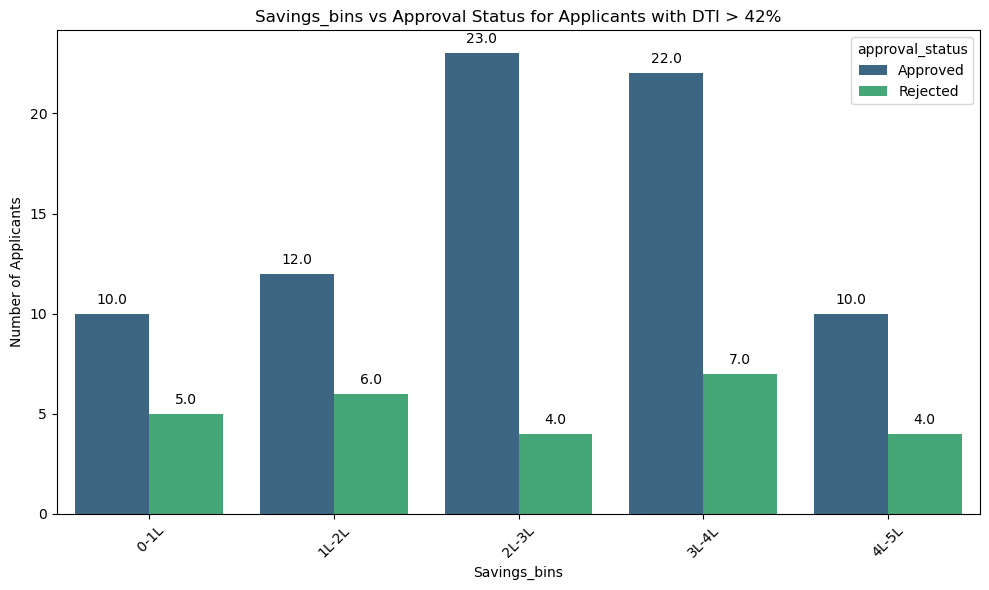

In [41]:
# Filter the DataFrame for DTI > 42
filtered_df = df[df['DTI'] > 42]

# Group by credit history and approval status to get the counts
credit_history_vs_approval = filtered_df.groupby(['Savings_bins', 'approval_status']).size().reset_index(name='counts')

# Plotting the bar chart for credit history with approval status for applicants with DTI > 42%
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=credit_history_vs_approval, x='Savings_bins', y='counts', hue='approval_status', palette='viridis')

# Set plot title and labels
plt.title('Savings_bins vs Approval Status for Applicants with DTI > 42%')
plt.xlabel('Savings_bins')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

Correlation Matrix:
                             DTI  MonthlySalary  loan_amount  \
DTI                     1.000000      -0.591798    -0.050762   
MonthlySalary          -0.591798       1.000000     0.011927   
loan_amount            -0.050762       0.011927     1.000000   
credit_history_encoded  0.002782       0.002662     0.080223   

                        credit_history_encoded  
DTI                                   0.002782  
MonthlySalary                         0.002662  
loan_amount                           0.080223  
credit_history_encoded                1.000000  


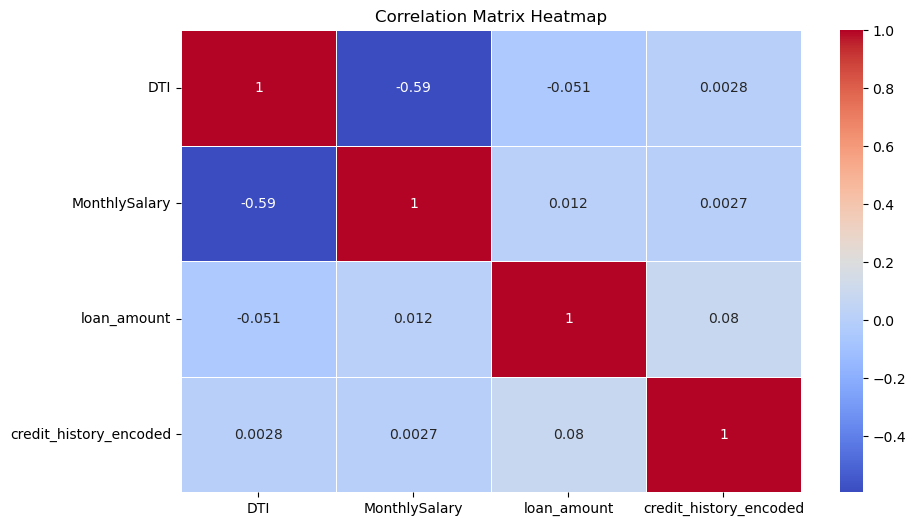

In [42]:

from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming df is your DataFrame containing loan information
# Step 1: Prepare the data (Optional: filter for rejected applications)
# Uncomment the line below if you want to filter for rejected applications
# df = df[df['approval_status'] == 'Rejected']

# Step 2: Encode categorical features
# Encode 'credit_history' (example: Good = 1, Bad = 0, etc.)
le = LabelEncoder()
df['credit_history_encoded'] = le.fit_transform(df['credit_history'])

# Step 3: Select relevant features for correlation analysis
features = ['DTI', 'MonthlySalary', 'loan_amount', 'credit_history_encoded']

# Step 4: Calculate correlation matrix
correlation_matrix = df[features].corr()

# Step 5: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 6: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


The correlation matrix does not show any strong relationships between the analyzed variables. However, based on common banking practices, lower DTI, higher income, and a good credit history are likely favorable for loan approval.
The weak correlations indicate that lenders consider multiple factors in combination rather than relying on a single metric. For better insights, a more detailed multivariate analysis, like logistic regression, may be conducted to determine the significance of each feature with respect to loan approval status.

Hypothesis Testing

In [43]:
import pandas as pd
from scipy.stats import ttest_ind
# Split the data into approved and rejected applicants based on approval status
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Extract DTI values for each group
dti_approved = approved_df['DTI']
dti_rejected = rejected_df['DTI']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(dti_approved, dti_rejected, equal_var=False)

# Display the results
print(f"T-Test Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean DTI between approved and rejected applicants.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean DTI between approved and rejected applicants.")


T-Test Statistic: 1.002717280832612
P-Value: 0.31701072900885285
Fail to reject the null hypothesis: There is no significant difference in mean DTI between approved and rejected applicants.
